<a href="https://colab.research.google.com/github/blingkey/self-study_ML-DeepLearning/blob/main/BreamAndSmelt4_CH3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A생선이 도미인지 아닌지 판별
혼공머신 03-1 k-최근접 이웃 회귀(p114-)

미션 : 농어의 높이, 길이 등의 수치로 무게 예측하기!

지도 학습 알고리즘은 **분류**와 **회귀**로 나뉜다.  
- **분류** : 샘플을 몇 개의 **클래스 중 하나로 분류**하는 문제  
- **회귀** : 임의의 어떤 숫자를 **예측**하는 문제  
ex. 내년도 경제 성장률 예측, 배달 도착 시간 예측  
> ### 농어의 무게 예측 (회귀)  
⇒ **회귀**는 두 변수 사이의 상관관계를 분석하는 방법

## 1. 데이터 준비
가정1) 농어의 **길이**만 있어도 무게를 잘 예측할 수 있다.  
- 특성 : 농어의 길이  
- 타깃 : 농의 무게

In [2]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

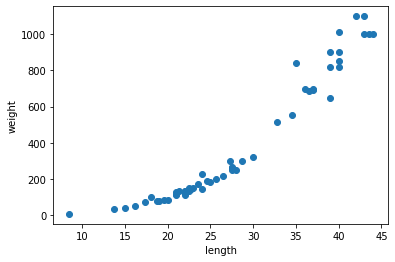

In [3]:
# 위의 데이터가 어떤 형태를 가지고 있는지 확인하기 위해 산점도로 나타내기
# 하나의 특성을 사용하므로 특성 데이터를 x축, 타깃 데이터를 y축에 둔다.

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어의 길이(x축)가 커짐에 따라 무게(y축)도 늘어남

In [4]:
# 데이터를 머신러닝 모델에 사용하기 전 train set, test set으로 나눈다.

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

사이킷런의 train_test_split() 함수를 사용해 train set과 test set로 나눈다.  
random_state=42로 지정해두고 확인

- 사이킷런에 사용할 train set는 2차원 배열  
perch_length가 1차원 배열이므로 이를 나눈 train_input과 test_input도 1차원 배열  
- 1차원 배열을 1개의 열이 있는 **2차원 배열로 변환**  
▸ 1차원 배열  
[1, 2, 3] → 크기: (3, )  
▸ 2차원 배열    
[[1],     
 [2],  
 [3]]     → 크기: (3 ,1)

### reshape() 메서드

In [5]:
# 크기를 바꿀 수 있는 numpy 배열의 reshape() 메서드
# (4, ) → (2, 2)
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [6]:
test_array =  test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [8]:
print(test_array)

[[1 2]
 [3 4]]


※ **reshape()** 메서드는 크기가 바뀐 새로운 배열을 반환할 때 **지정한 크기**가 **원본 배열에 있는 원소의 개수**가 **동일**해야 한다!  
test_array = test_array.reshape(2 ,3)  
⇒ ValueError: cannot reshape array of size 4 into shape (2,3)

**reshape(-1, 1)**를 사용하면 넘파이는 배열의 크기를 자동으로 지정  
배열의 전체 원소 개수를 매번 외우지 않아도 된다!  

In [9]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 2. 결정계수(R^2)

In [10]:
# KNeighborsRegressor : 사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스
# KNeighborsRegressor클래스를 사용하여 객체를 생성하고 fit() 메서드로 회귀모델 훈련

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [11]:
# test set의 점수 확인
print(knr.score(test_input, test_target))

0.992809406101064


위의 test set 점수가 의미하는 것?  
⇒ **결정계수(coefficient of determination)** 또는 **R^2**   
⇒ R^2은 1에 가까울수록 good!

- **결정계수** 계산 방식  
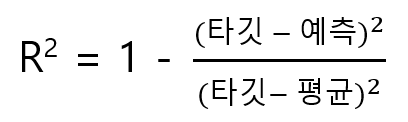  
타깃의 평균 정도를 예측하는 수준이라면(= 분자와 분모가 비슷해져) R^2는 0에 가까워지고,  
타깃이 예측에 아주 가까워지면(= 분모가 0에 가까워지기 때문에) 1에 가까운 값이 된다.

사이킷런의 score() 메서드가 출력하는 값은 높을수록 good!  
만약 score() 메서드가 에러율을 반환한다면 이를 음수로 만들어 실제로는 낮은 에러가 score() 메서드로 반환될 때는 높은 값이 되도록 바꾼다.

R^2 이외의 정량적인 평가를 통한 방법
- ### mean_absolute_error  
타깃과 예측의 절댓값 오차를 평균하여 반환

In [12]:
from sklearn.metrics import mean_absolute_error

# test set에 대한 예측 만들기
test_prediction = knr.predict(test_input)

# test set에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


mean_absolute_error를 통해 결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 확인  

## 3. 과대적합 vs 과소적합

### train set로 평가  
score() 메서드에 train set을 전달하여 점수 출력  
(지금까지는 train set으로 모델 훈련 후 test set으로 모델 평가)

In [13]:
# 앞서 훈련한 모델을 사용한 train set의 R^2 점수
print(knr.score(train_input, train_target))

0.9698823289099254


test set으로 평가 : 0.992809406101064  
train set으로 평가 : 0.9698823289099254  

test set 평가 > train set 평가  
⇒ 과소적합

- **과대적합(overfitting)**  
train set의 평가 점수가 굉장히 좋았는데 test set의 평가 점수가 굉장히 나쁜 경우  
- **과소적합(underfitting)**  
train set보다 test set의 점수가 높거나 두 점수가 모두 낮을 경우  
(모델이 너무 단순하여 train test에 적절히 훈련되지 않은 경우)

Q. 과소적합이 발생하는 이유?  
A. train set과 test set의 크기가 매우 작은 경우  
데이터가 작으면 test set이 train set의 특징을 따르지 못한다.

#### 과소적합을 해결하는 방법  
→ 모델을 조금 더 복잡하게 만든다.  
(train set에 더 잘 맞게 만들기!)  
- k-최근접 이웃 알고리즘으로 모델을 복잡하게 만드는 방법  
→ 이웃의 개수 k를 줄이기  
이웃의 개수를 줄이면 train set에 있는 국지적인 패턴에 민감해지고,  
이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따른다.

In [14]:
# 이웃의 개수를 3으로 낮추기
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [15]:
# test set의 평가점수
print(knr.score(test_input, test_target))

0.9746459963987609


train set의 점수 > test set의 점수  
두 점수의 차이 크지 않음  

회귀 모델 훈련 성공!!